<a href="https://colab.research.google.com/github/ustab/GUIDED_PROJECTS_STUDIES/blob/main/capstoneTweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
# Any results you write to the current directory are saved as output.

In [6]:
df=pd.read_csv('/content/Tweets.csv')
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


Data Preprocessing¶
The first step should be to check the shape of the dataframe and then check the number of null values in each column.

In this way we can get an idea of the redundant columns in the data frame depending on which columns have the highest number of null values.

In [7]:
df.shape

(14640, 15)

In [8]:
df.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [9]:
print("Percentage null or na values in df")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Percentage null or na values in df


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

In [10]:
#tweet_coord , airline_sentiment_gold, negativereason_gold 
#have more than 90% missing data. 
#It will be better to delete these columns as they will not provide any constructive information.

In [11]:
del df['tweet_coord']
del df['airline_sentiment_gold']
del df['negativereason_gold']
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


Airline sentiments for each airline
Firstly lets calculate the total number of tweets for each airline
Then, we are going to get the barplots for each airline with respect to sentiments of tweets (positive,negative or neutral).
This will give us a clearer idea about the airline sentiments , airlines relationship.

Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


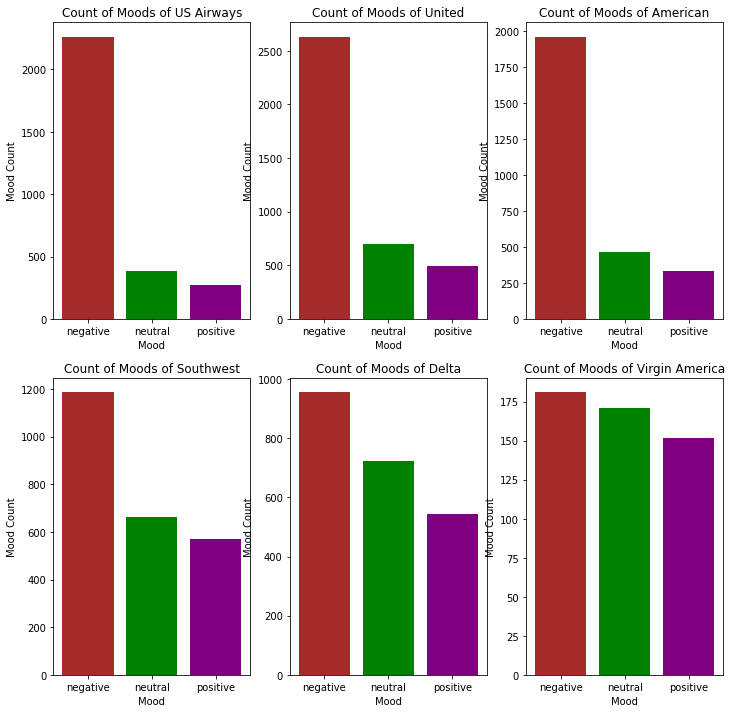

In [12]:
print("Total number of tweets for each airline \n ",df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(12, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=df[df['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['brown', 'green', 'purple'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+i)

United, US Airways, American substantially get negative reactions.
Tweets for Virgin America are the most balanced.

Most used words in Positive and Negative tweets

In [13]:
from wordcloud import WordCloud,STOPWORDS

The goal is to firstly get an idea of the most frequent words in negative tweets.
Get idea about most frequent words in positive tweets.

Wordcloud for Negative sentiments of tweets¶

Wordcloud is a great tool for visualizing nlp data. The larger the words in the wordcloud image , the more is the frequency of that word in our text data.

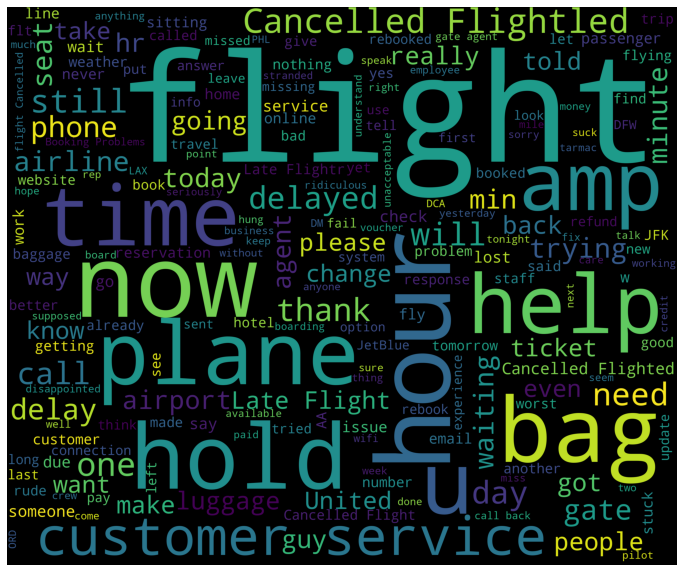

In [14]:
new_df=df[df['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Wordcloud for positive reasons

The code for getting positive sentiments is completely same with the one for negative sentiments. Just replace negative with positive in the first line. Easy, right!

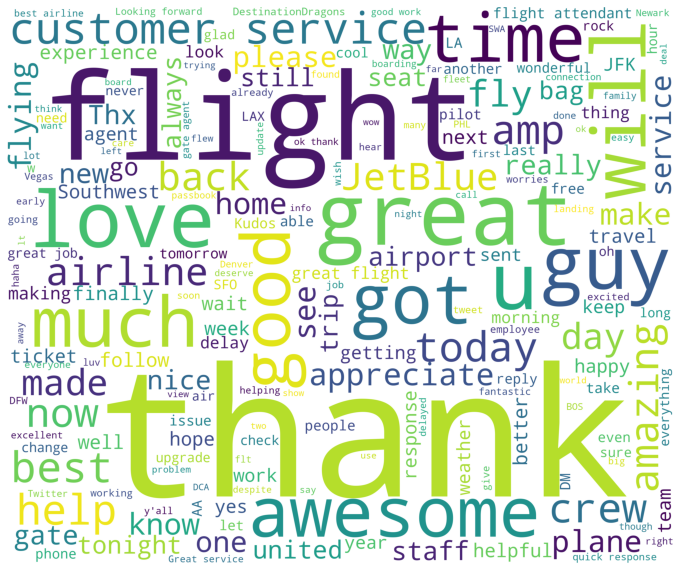

In [15]:
new_df=df[df['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Lets try and calculate the highest frequency words in postive sentimental tweets

In [16]:
# Calculate highest frequency words in positive tweets
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
        if(str.count(str2[i])>50): 
            print('Frequency of', str2[i], 'is :', str.count(str2[i]))
        
print(freq(cleaned_word))

Frequency of to is : 923
Frequency of the is : 924
Frequency of time is : 59
Frequency of I is : 574
Frequency of fly is : 54
Frequency of this is : 143
Frequency of :) is : 96
Frequency of it is : 166
Frequency of was is : 226
Frequency of and is : 416
Frequency of an is : 74
Frequency of good is : 75
Frequency of so is : 163
Frequency of much is : 54
Frequency of is is : 219
Frequency of a is : 501
Frequency of great is : 144
Frequency of my is : 320
Frequency of &amp; is : 77
Frequency of on is : 327
Frequency of I'm is : 67
Frequency of flying is : 59
Frequency of your is : 212
Frequency of all is : 92
Frequency of from is : 124
Frequency of Thanks! is : 69
Frequency of for is : 658
Frequency of flight is : 263
Frequency of but is : 91
Frequency of you is : 509
Frequency of would is : 56
Frequency of be is : 135
Frequency of with is : 195
Frequency of you. is : 77
Frequency of love is : 85
Frequency of You is : 62
Frequency of are is : 120
Frequency of of is : 236
Frequency of that

Words like Thanks, best, customer , love, flying , good are understandably present in the most frequent words of positive tweets.
However, other than these, most of the words are stop words and need to be filtered. We will do so later.
Lets try and visualize the reasons for negative tweets first !!
What are the reasons for negative sentimental tweets for each airline ?
We will explore the negative reason column of our dataframe to extract conclusions about negative sentiments in the tweets by the customers

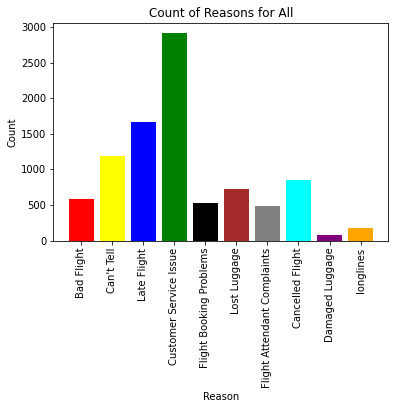

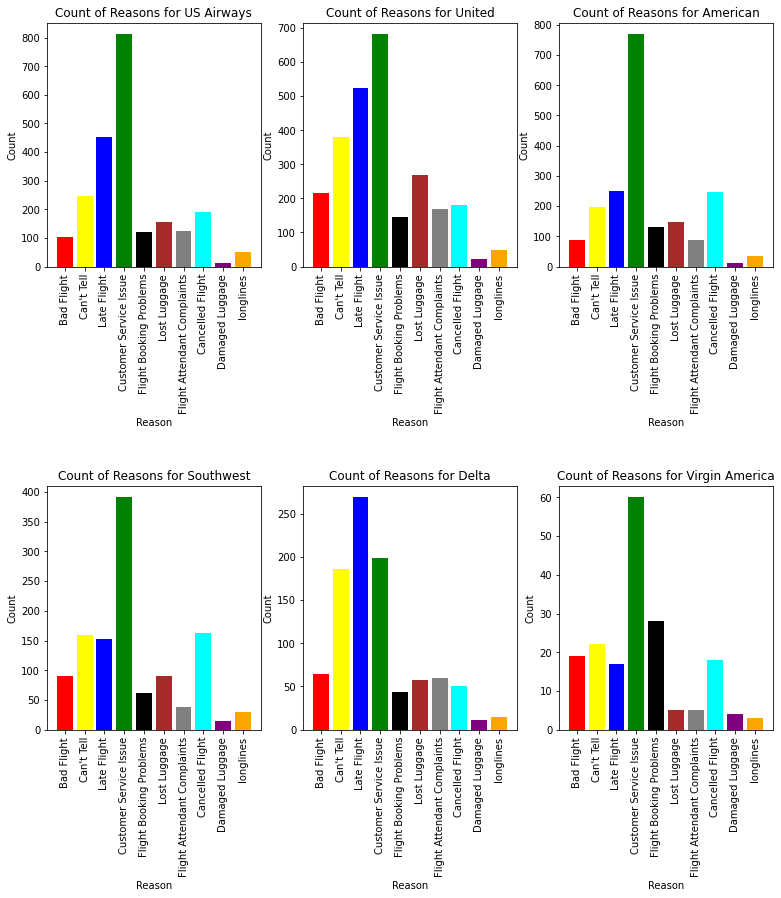

In [17]:
#get the number of negative reasons
df['negativereason'].nunique()

NR_Count=dict(df['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        a=df
    else:
        a=df[df['airline']==Airline]
    count=dict(a['negativereason'].value_counts())
    Unique_reason=list(df['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame
def plot_reason(Airline):
    
    a=NR_Count(Airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count, color=['red','yellow','blue','green','black','brown','gray','cyan','purple','orange'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)
    
plot_reason('All')
plt.figure(2,figsize=(13, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)

Customer Service Issue is the main neagtive reason for US Airways,United,American,Southwest,Virgin America
Late Flight is the main negative reason for Delta
Interestingly, Virgin America has the least count of negative reasons (all less than 60)
Contrastingly to Virgin America, airlines like US Airways,United,American have more than 500 negative reasons (Late flight, Customer Service Issue)
Is there a relationship between negative sentiments and date ?
Our dataframe has data from 2015-02-17 to 2015-02-24

It will be interesting to see if the date has any effect on the sentiments of the tweets(especially negative !). We can draw various coclusions by visualizing this.

In [18]:
date = df.reset_index()
#convert the Date column to pandas datetime
date.tweet_created = pd.to_datetime(date.tweet_created)
#Reduce the dates in the date column to only the date and no time stamp using the 'dt.date' method
date.tweet_created = date.tweet_created.dt.date
date.tweet_created.head()
df = date
day_df = df.groupby(['tweet_created','airline','airline_sentiment']).size()
# day_df = day_df.reset_index()
day_df

tweet_created  airline         airline_sentiment
2015-02-16     Delta           negative               1
                               neutral                1
               United          negative               2
2015-02-17     Delta           negative             108
                               neutral               86
                                                   ... 
2015-02-24     United          neutral               49
                               positive              25
               Virgin America  negative              10
                               neutral                6
                               positive              13
Length: 136, dtype: int64

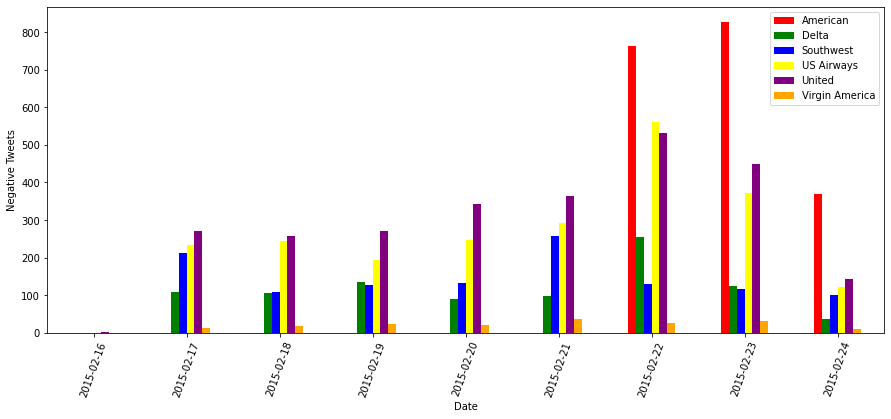

In [19]:
day_df = day_df.loc(axis=0)[:,:,'negative']

#groupby and plot data
ax2 = day_df.groupby(['tweet_created','airline']).sum().unstack().plot(kind = 'bar', color=['red', 'green', 'blue','yellow','purple','orange'], figsize = (15,6), rot = 70)
labels = ['American','Delta','Southwest','US Airways','United','Virgin America']
ax2.legend(labels = labels)
ax2.set_xlabel('Date')
ax2.set_ylabel('Negative Tweets')
plt.show()

Interestingly, American has a sudden upsurge in negative sentimental tweets on 2015-02-23, which reduced to half the very next day 2015-02-24. (I hope American is doing better these days and resolved their Customer Service Issue as we saw before)
Virgin America has the least number of negative tweets throughout the weekly data that we have. It should be noted that the total number of tweets for Virgin America was also significantly less as compared to the rest airlines, and hence the least negative tweets.
The negative tweets for all the rest airlines is slightly skewed towards the end of the week !
Preprocessing the tweet text data
Now, we will clean the tweet text data and apply classification algorithms on it

In [20]:
def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
df['clean_tweet']=df['text'].apply(lambda x: tweet_to_words(x))

In [23]:
train,test = train_test_split(df,test_size=0.2,random_state=42)

In [24]:
train_clean_tweet=[]
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)

Prediciting sentiments from tweet text data
Decision Tree Classifier
Random Forest Classifier

In [26]:
import seaborn as sns

In [27]:
Classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200)]

Accuracy of DecisionTreeClassifieris 0.6806693989071039
              precision    recall  f1-score   support

    negative       0.79      0.80      0.79      1860
     neutral       0.43      0.40      0.42       619
    positive       0.57      0.58      0.57       449

    accuracy                           0.68      2928
   macro avg       0.59      0.59      0.59      2928
weighted avg       0.68      0.68      0.68      2928



<Figure size 432x288 with 0 Axes>

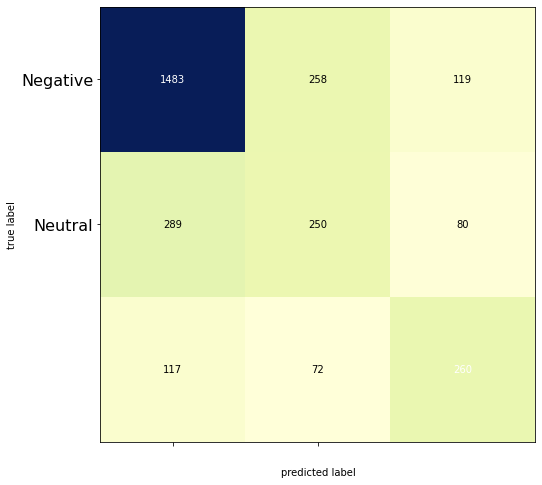

Accuracy of RandomForestClassifieris 0.7674180327868853
              precision    recall  f1-score   support

    negative       0.91      0.82      0.86      2093
     neutral       0.44      0.58      0.50       446
    positive       0.60      0.71      0.65       389

    accuracy                           0.77      2928
   macro avg       0.65      0.70      0.67      2928
weighted avg       0.80      0.77      0.78      2928



<Figure size 432x288 with 0 Axes>

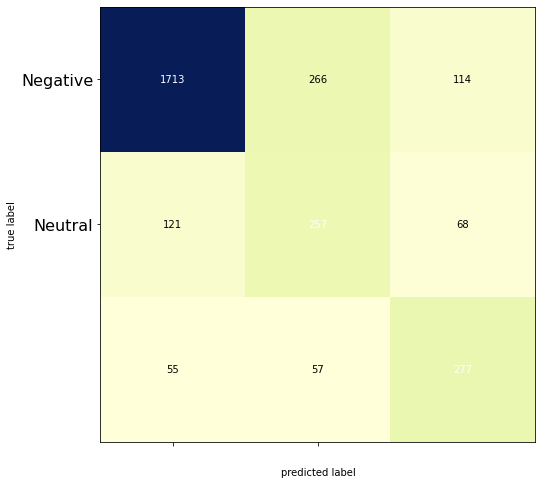

In [120]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['airline_sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['airline_sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['airline_sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))
    print(classification_report(pred,test['airline_sentiment']))
    cm=confusion_matrix(pred , test['airline_sentiment'])
    plt.figure()
    plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap="YlGnBu")
    plt.xticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='white')
    plt.yticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16)
    plt.show()

In [29]:
df.to_csv('clean_tweet.csv')

In [30]:
pd.read_csv('clean_tweet.csv')

,Unnamed: 0,index,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,clean_tweet
0,0,0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24,NaN,Eastern Time (US & Canada),virginamerica dhepburn said
1,1,1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada),virginamerica plus added commercials experienc...
2,2,2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24,Lets Play,Central Time (US & Canada),virginamerica today must mean need take anothe...
3,3,3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada),virginamerica really aggressive blast obnoxiou...
4,4,4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada),virginamerica really big bad thing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,14635,14635,569587686496825344,positive,0.3487,NaN,0.0000,American,KristenReenders,0,@AmericanAir thank you we got on a different f...,2015-02-22,NaN,NaN,americanair thank got different flight chicago
14636,14636,14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,2015-02-22,Texas,NaN,americanair leaving minutes late flight warnin...
14637,14637,14637,569587242672398336,neutral,1.0000,NaN,NaN,American,sanyabun,0,@AmericanAir Please bring American Airlines to...,2015-02-22,"Nigeria,lagos",NaN,americanair please bring american airlines bla...
14638,14638,14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,SraJackson,0,"@AmericanAir you have my money, you change my ...",2015-02-22,New Jersey,Eastern Time (US & Canada),americanair money change flight answer phones ...


In [31]:
df.shape

(14640, 14)

In [32]:
df.columns

Index(['index', 'tweet_id', 'airline_sentiment',
       'airline_sentiment_confidence', 'negativereason',
       'negativereason_confidence', 'airline', 'name', 'retweet_count', 'text',
       'tweet_created', 'tweet_location', 'user_timezone', 'clean_tweet'],
      dtype='object')

In [33]:
df.drop(['clean_tweet'], axis=1, inplace=True)

In [34]:
df.columns

Index(['index', 'tweet_id', 'airline_sentiment',
       'airline_sentiment_confidence', 'negativereason',
       'negativereason_confidence', 'airline', 'name', 'retweet_count', 'text',
       'tweet_created', 'tweet_location', 'user_timezone'],
      dtype='object')

In [35]:
df.shape

(14640, 13)

In [36]:
df.isnull().sum()*100 / df.shape[0]     # Null %

index                            0.000000
tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
name                             0.000000
retweet_count                    0.000000
text                             0.000000
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

In [37]:
# Columns that have missing values :
miss_val = []

[miss_val.append(column) for column in df.columns if any(df[column].isnull())]

print("Columns that have missing values :")
miss_val

Columns that have missing values :


['negativereason',
 'negativereason_confidence',
 'tweet_location',
 'user_timezone']

In [38]:
# function for first looking to the columns

def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print("--------------------------------")
    print(df[col].value_counts(dropna = False))

In [39]:
def fill_most_freq(df, group_col, col_name):
    
    '''Fills the missing values with the most existing value (mode) in the relevant column according to single-stage grouping'''
    
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        mode = list(df[cond][col_name].mode())
        if mode != []:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[cond][col_name].mode()[0])
        else:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[col_name].mode()[0])
    print("Number of NaN : ", df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [40]:
def fill_prop(df, group_col, col_name):
    
    '''Fills the missing values with "ffill and bfill method" according to single-stage grouping'''
    
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        df.loc[cond, col_name] = df.loc[cond, col_name].fillna(method="ffill").fillna(method="bfill")
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    print("Number of NaN : ", df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [41]:
def fill(df, group_col1, group_col2, col_name, method): # method can be either "mode" or "mean" or "median" or "ffill"
    
    '''Fills the missing values with "mode/mean/median/ffill/bfill method" according to double-stage grouping'''
    
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])

    elif method == "mean":
        df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("mean"), inplace = True)
        df[col_name].fillna(df.groupby(group_col1)[col_name].transform("mean"), inplace = True)
        df[col_name].fillna(df[col_name].mean(), inplace = True)
        
    elif method == "median":
        df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("median"), inplace = True)
        df[col_name].fillna(df.groupby(group_col1)[col_name].transform("median"), inplace = True)
        df[col_name].fillna(df[col_name].median(), inplace = True)
        
    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [42]:
# Columns that have missing values :
miss_val = []

[miss_val.append(column) for column in df.columns if any(df[column].isnull())]

print("Columns that have missing values :")
miss_val

Columns that have missing values :


['negativereason',
 'negativereason_confidence',
 'tweet_location',
 'user_timezone']

In [43]:
df.isnull().sum()*100 / df.shape[0]     # Null %

index                            0.000000
tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
name                             0.000000
retweet_count                    0.000000
text                             0.000000
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

In [44]:
first_looking('negativereason')

column name    :  negativereason
--------------------------------
per_of_nulls   :  % 37.31
num_of_nulls   :  5462
num_of_uniques :  10
--------------------------------
NaN                            5462
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


In [45]:
df['negativereason'].fillna('no_complaint', inplace=True)

In [46]:
df['negativereason_confidence'].fillna(1, inplace=True)

In [47]:
df.groupby(['airline_sentiment','negativereason','negativereason_confidence','airline_sentiment_confidence']).airline.describe()

count  \
airline_sentiment negativereason negativereason_confidence airline_sentiment_confidence         
negative          Bad Flight     0.3164                    0.6316                           1   
                                 0.3221                    0.6350                           1   
                                 0.3265                    0.6327                           1   
                                                           0.6421                           1   
                                 0.3275                    0.6507                           1   
...                                                                                       ...   
positive          no_complaint   1.0000                    0.7162                           1   
                                                           0.7172                           1   
                                                           0.7185                           1   
                                                           0.7263                           1   
                                                           1.0000                        1515   

                                                                                        unique  \
airline_sentiment negativereason negativereason_confidence airline_sentiment_confidence          
negative          Bad Flight     0.3164                    0.6316                            1   
                                 0.3221                    0.6350                            1   
                                 0.3265                    0.6327                            1   
                                                           0.6421                            1   
                                 0.3275                    0.6507                            1   
...                                                                                        ...   
positive          no_complaint   1.0000                    0.7162                            1   
                                                           0.7172                            1   
                                                           0.7185                            1   
                                                           0.7263                            1   
                                                           1.0000                            6   

                                                                                                    top  \
airline_sentiment negativereason negativereason_confidence airline_sentiment_confidence                   
negative          Bad Flight     0.3164                    0.6316                              American   
                                 0.3221                    0.6350                                United   
                                 0.3265                    0.6327                             Southwest   
                                                           0.6421                                 Delta   
                                 0.3275                    0.6507                            US Airways   
...                                                                                                 ...   
positive          no_complaint   1.0000                    0.7162                        Virgin America   
                                                           0.7172                             Southwest   
                                                           0.7185                                United   
                                                           0.7263                                 Delta   
                                                           1.0000                             Southwest   

                                                                                        freq  
airline_sentiment negativereason negativereason_confidence airli

In [48]:
df.columns

Index(['index', 'tweet_id', 'airline_sentiment',
       'airline_sentiment_confidence', 'negativereason',
       'negativereason_confidence', 'airline', 'name', 'retweet_count', 'text',
       'tweet_created', 'tweet_location', 'user_timezone'],
      dtype='object')

In [49]:
df.drop(['index', 'tweet_id','name', 'retweet_count', 'text',
       'tweet_created', 'tweet_location', 'user_timezone'], axis=1, inplace=True)

In [50]:
df.columns

Index(['airline_sentiment', 'airline_sentiment_confidence', 'negativereason',
       'negativereason_confidence', 'airline'],
      dtype='object')

In [51]:
df.to_csv("filled_tweet.csv", index=False)

In [52]:
pd.read_csv('filled_tweet.csv')

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline
0,neutral,1.0000,no_complaint,1.0000,Virgin America
1,positive,0.3486,no_complaint,0.0000,Virgin America
2,neutral,0.6837,no_complaint,1.0000,Virgin America
3,negative,1.0000,Bad Flight,0.7033,Virgin America
4,negative,1.0000,Can't Tell,1.0000,Virgin America
...,...,...,...,...,...
14635,positive,0.3487,no_complaint,0.0000,American
14636,negative,1.0000,Customer Service Issue,1.0000,American
14637,neutral,1.0000,no_complaint,1.0000,American
14638,negative,1.0000,Customer Service Issue,0.6659,American


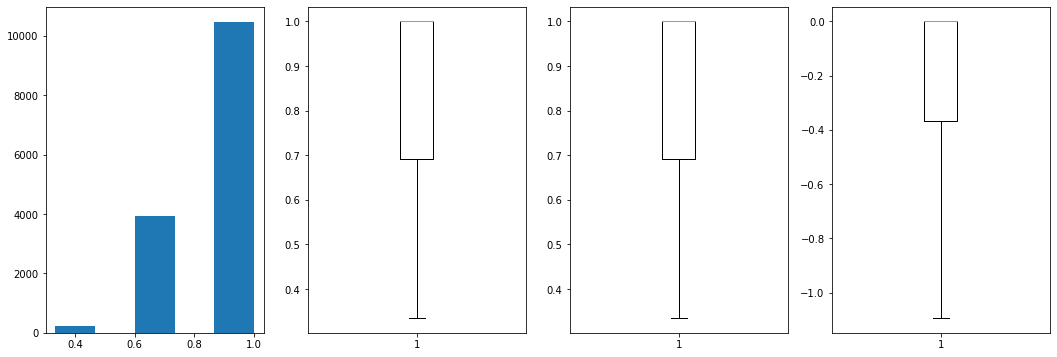

In [53]:
plt.figure(figsize=(18, 6))

plt.subplot(141)
plt.hist(df.airline_sentiment_confidence, bins=5)

plt.subplot(142)
plt.boxplot(df.airline_sentiment_confidence)

plt.subplot(143)
plt.boxplot(df.airline_sentiment_confidence, whis=3)

plt.subplot(144)
plt.boxplot(np.log(df.airline_sentiment_confidence), whis=3)

plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


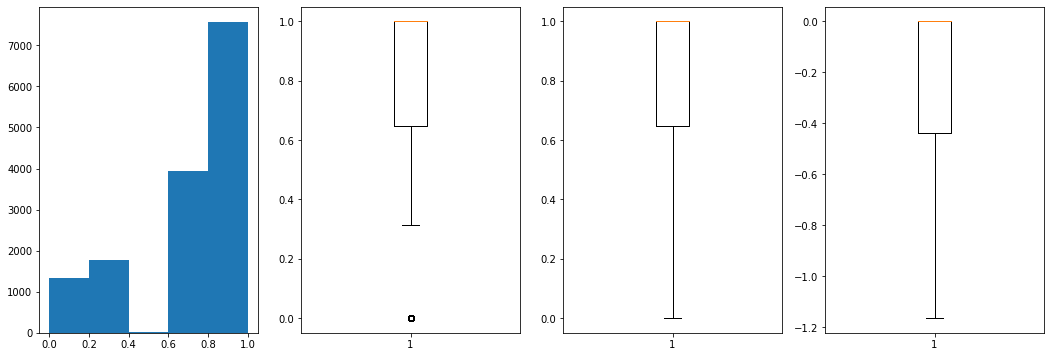

In [54]:
plt.figure(figsize=(18, 6))

plt.subplot(141)
plt.hist(df.negativereason_confidence, bins=5)

plt.subplot(142)
plt.boxplot(df.negativereason_confidence)

plt.subplot(143)
plt.boxplot(df.negativereason_confidence, whis=3)

plt.subplot(144)
plt.boxplot(np.log(df.negativereason_confidence), whis=3)

plt.show()

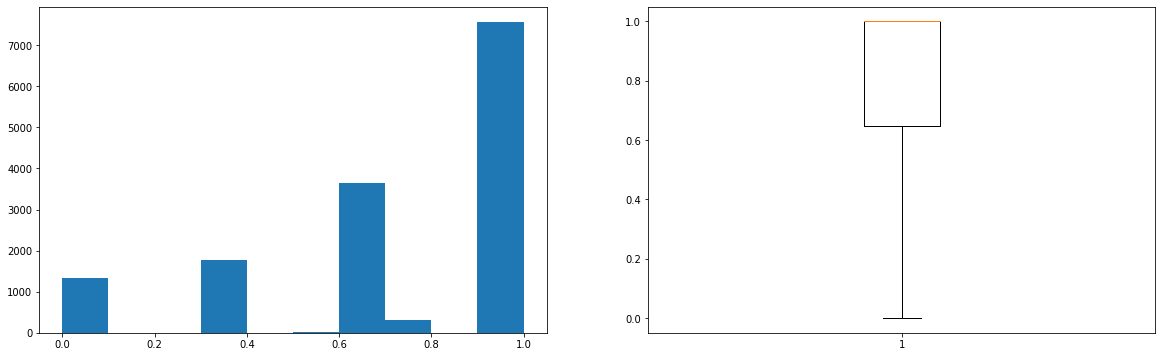

In [73]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.negativereason_confidence)

plt.subplot(122)
plt.boxplot(df.negativereason_confidence, whis=3)

plt.show()

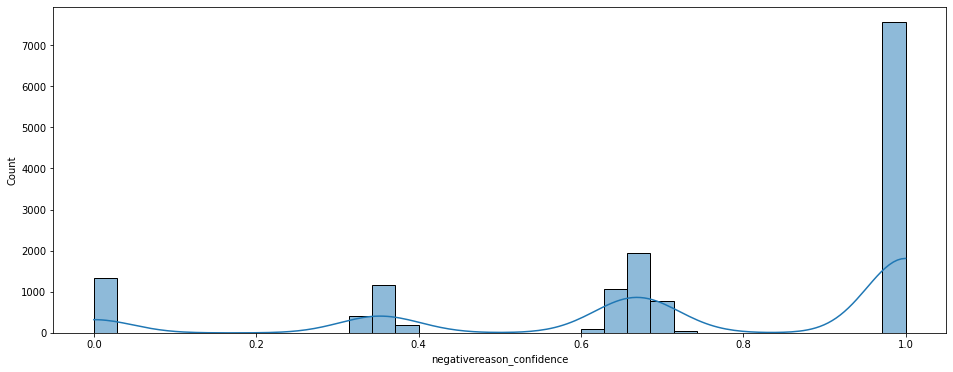

In [70]:
plt.figure(figsize=(16, 6))
sns.histplot(df, x="negativereason_confidence", kde=True)
plt.show()

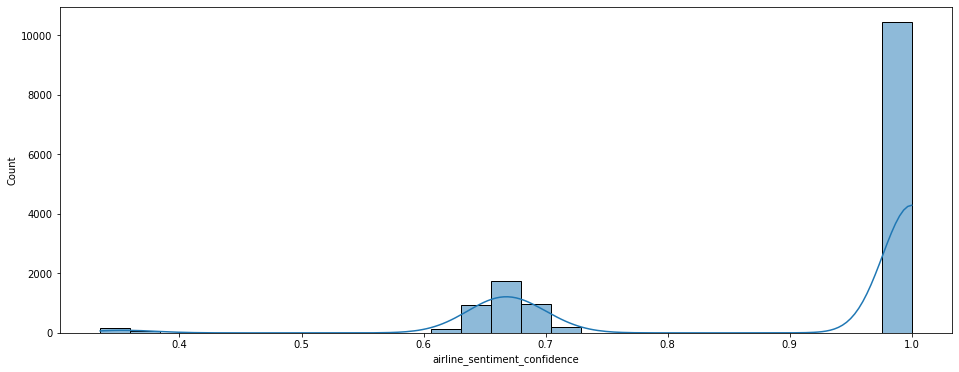

In [69]:
plt.figure(figsize=(16, 6))
sns.histplot(x="airline_sentiment_confidence", data=df, kde=True)
plt.show()

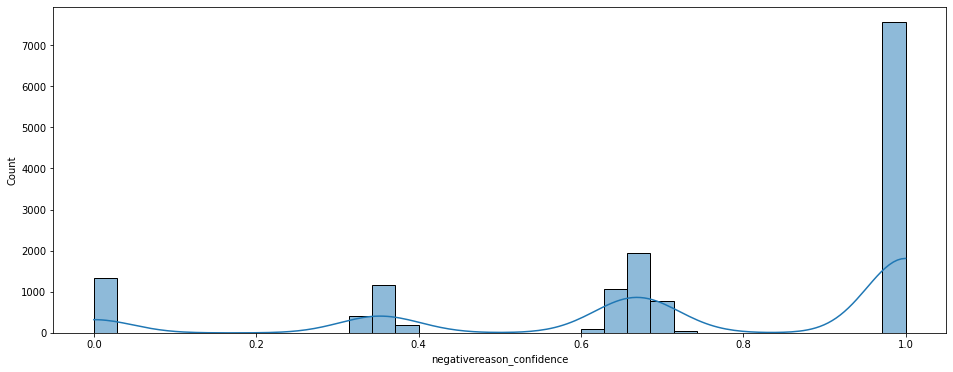

In [68]:
plt.figure(figsize=(16, 6))
sns.histplot(x="negativereason_confidence",data=df, kde=True)
plt.show()

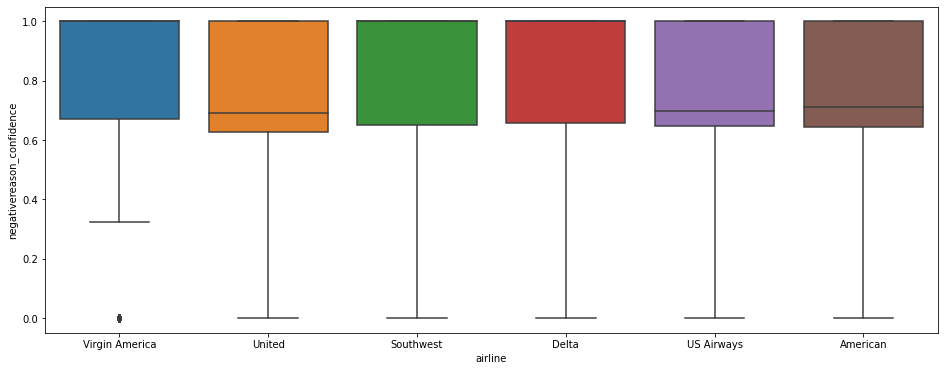

In [82]:
plt.figure(figsize=(16, 6))
sns.boxplot(x="airline", y="negativereason_confidence", data=df, whis=2)
plt.show()

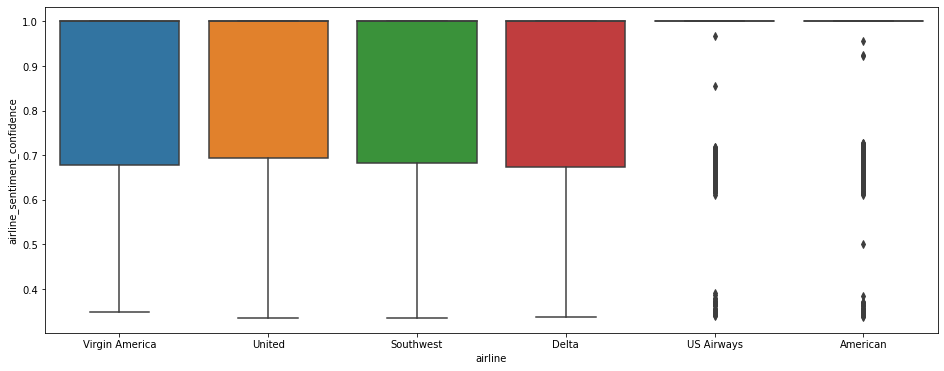

In [80]:
plt.figure(figsize=(16, 6))
sns.boxplot(x="airline", y="airline_sentiment_confidence", data=df, whis=2)
plt.show()

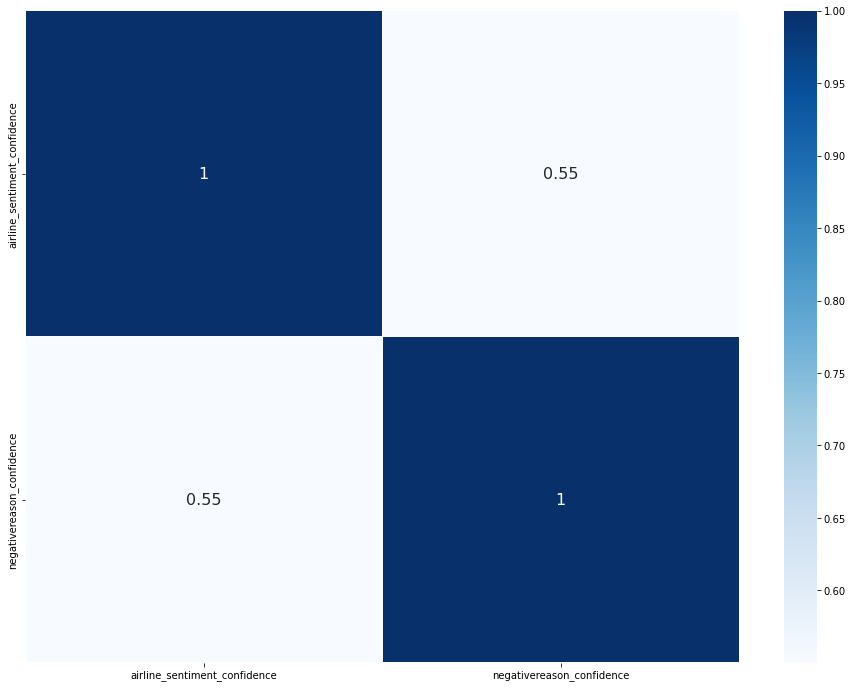

In [84]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap="Blues", linewidths=0.2, annot_kws={"size": 16});

In [85]:
def color_correlation(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'cyan'    
    else:
        color = 'black'
    return 'color: %s' % color
 
df.corr().style.applymap(color_correlation)

,airline_sentiment_confidence,negativereason_confidence
airline_sentiment_confidence,1.000000,0.550029
negativereason_confidence,0.550029,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1872x2304 with 0 Axes>

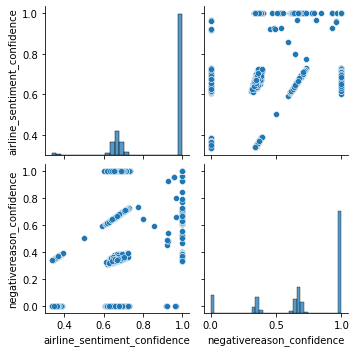

In [89]:
plt.figure(figsize=(26, 32))
sns.pairplot(df, size=2.5);

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   airline_sentiment             14640 non-null  object 
 1   airline_sentiment_confidence  14640 non-null  float64
 2   negativereason                14640 non-null  object 
 3   negativereason_confidence     14640 non-null  float64
 4   airline                       14640 non-null  object 
dtypes: float64(2), object(3)
memory usage: 572.0+ KB


In [96]:
dfairline_sentiment = np.array([['neutral'], ['positive'], ['negative']])

In [97]:
dfairline_sentiment_columns = ['neutral','positive','negative']

In [99]:
dfairline_sentiment_columns

['neutral', 'positive', 'negative']

In [103]:
######################## sadece sayisal degerli kolonlari alr ##################################
df_num = df.select_dtypes("number")
df_num

,airline_sentiment_confidence,negativereason_confidence
0,1.0000,1.0000
1,0.3486,0.0000
2,0.6837,1.0000
3,1.0000,0.7033
4,1.0000,1.0000
...,...,...
14635,0.3487,0.0000
14636,1.0000,1.0000
14637,1.0000,1.0000
14638,1.0000,0.6659


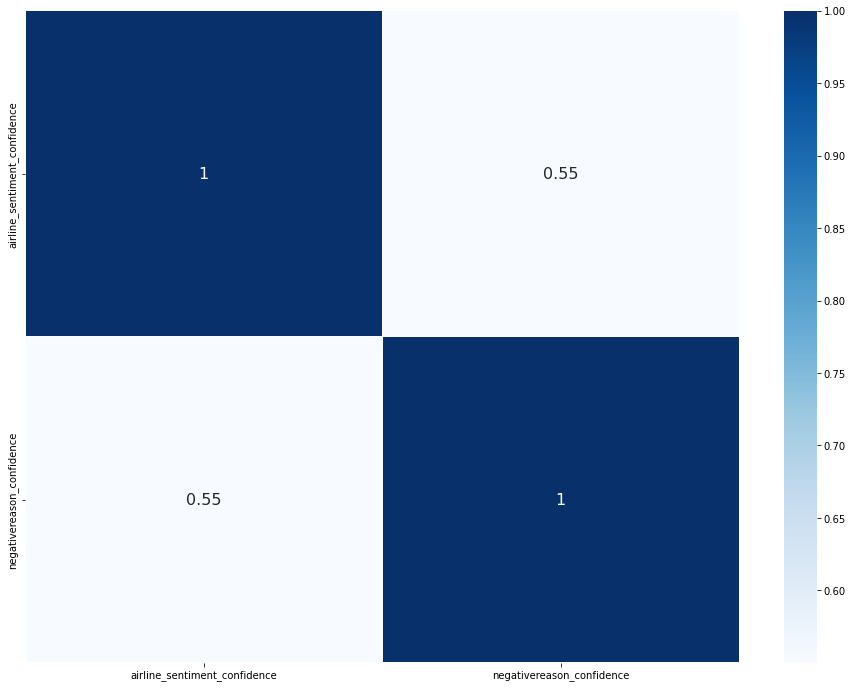

In [105]:
plt.figure(figsize=(16, 12))

sns.heatmap(df_num.corr(), annot=True, cmap="Blues", linewidths=0.2, annot_kws={"size": 16});

In [107]:
df.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline
0,neutral,1.0000,no_complaint,1.0000,Virgin America
1,positive,0.3486,no_complaint,0.0000,Virgin America
2,neutral,0.6837,no_complaint,1.0000,Virgin America
3,negative,1.0000,Bad Flight,0.7033,Virgin America
4,negative,1.0000,Can't Tell,1.0000,Virgin America


In [104]:
df.shape

(14640, 5)

In [109]:
df.to_csv("final_Tweet_not_dummy.csv", index=False)

In [110]:
pd.read_csv('final_Tweet_not_dummy.csv')

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline
0,neutral,1.0000,no_complaint,1.0000,Virgin America
1,positive,0.3486,no_complaint,0.0000,Virgin America
2,neutral,0.6837,no_complaint,1.0000,Virgin America
3,negative,1.0000,Bad Flight,0.7033,Virgin America
4,negative,1.0000,Can't Tell,1.0000,Virgin America
...,...,...,...,...,...
14635,positive,0.3487,no_complaint,0.0000,American
14636,negative,1.0000,Customer Service Issue,1.0000,American
14637,neutral,1.0000,no_complaint,1.0000,American
14638,negative,1.0000,Customer Service Issue,0.6659,American


In [111]:
# Once katagorik sutunlari Dummy yapariz

df = df.join(df["airline_sentiment"].str.get_dummies(sep=",").add_prefix("as_"))
df = df.join(df["negativereason"].str.get_dummies(sep=",").add_prefix("nr_"))
df = df.join(df["airline"].str.get_dummies(sep = ",").add_prefix("al_"))

In [112]:
df.shape

(14640, 25)

In [113]:
df_final = pd.get_dummies(df, drop_first=True)

In [114]:
df_final.shape

(14640, 39)

In [115]:
df_final.head().T

,0,1,2,3,4
airline_sentiment_confidence,1.0,0.3486,0.6837,1.0000,1.0
negativereason_confidence,1.0,0.0000,1.0000,0.7033,1.0
as_negative,0.0,0.0000,0.0000,1.0000,1.0
as_neutral,1.0,0.0000,1.0000,0.0000,0.0
as_positive,0.0,1.0000,0.0000,0.0000,0.0
nr_Bad Flight,0.0,0.0000,0.0000,1.0000,0.0
nr_Can't Tell,0.0,0.0000,0.0000,0.0000,1.0
nr_Cancelled Flight,0.0,0.0000,0.0000,0.0000,0.0
nr_Customer Service Issue,0.0,0.0000,0.0000,0.0000,0.0
nr_Damaged Luggage,0.0,0.0000,0.0000,0.0000,0.0


In [118]:
df_final.to_csv("final_Tweet_dummy.csv", index=False)
df=pd.read_csv('final_Tweet_dummy.csv')
df

,airline_sentiment_confidence,negativereason_confidence,as_negative,as_neutral,as_positive,nr_Bad Flight,nr_Can't Tell,nr_Cancelled Flight,nr_Customer Service Issue,nr_Damaged Luggage,...,negativereason_Flight Booking Problems,negativereason_Late Flight,negativereason_Lost Luggage,negativereason_longlines,negativereason_no_complaint,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America
0,1.0000,1.0000,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0.3486,0.0000,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.6837,1.0000,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1.0000,0.7033,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1.0000,1.0000,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0.3487,0.0000,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
14636,1.0000,1.0000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
14637,1.0000,1.0000,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
14638,1.0000,0.6659,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
df.corr()

,airline_sentiment_confidence,negativereason_confidence,as_negative,as_neutral,as_positive,nr_Bad Flight,nr_Can't Tell,nr_Cancelled Flight,nr_Customer Service Issue,nr_Damaged Luggage,...,negativereason_Flight Booking Problems,negativereason_Late Flight,negativereason_Lost Luggage,negativereason_longlines,negativereason_no_complaint,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America
airline_sentiment_confidence,1.000000,0.550029,0.264284,-0.244625,-0.075794,0.031992,-0.027588,0.063319,0.157376,0.024321,...,-0.028193,0.088308,0.061776,0.029515,-0.264284,-0.078693,-0.037314,0.065534,0.002588,-0.027928
negativereason_confidence,0.550029,1.000000,-0.033098,-0.107573,0.162950,-0.067914,-0.101301,0.032940,0.061531,-0.001454,...,-0.079647,0.031925,0.051391,-0.049994,0.033098,0.042422,0.030250,-0.008145,-0.059811,0.032152
as_negative,0.264284,-0.033098,1.000000,-0.671718,-0.568701,0.156683,0.229464,0.191168,0.384237,0.054985,...,0.149366,0.276347,0.175960,0.085585,-1.000000,-0.172412,-0.125905,0.154530,0.076192,-0.104552
as_neutral,-0.244625,-0.107573,-0.671718,1.000000,-0.227339,-0.105247,-0.154135,-0.128411,-0.258099,-0.036935,...,-0.100332,-0.185628,-0.118196,-0.057489,0.671718,0.117740,0.068304,-0.098688,-0.042655,0.058983
as_positive,-0.075794,0.162950,-0.568701,-0.227339,1.000000,-0.089106,-0.130496,-0.108717,-0.218516,-0.031270,...,-0.084944,-0.157159,-0.100069,-0.048672,0.568701,0.095910,0.089666,-0.093558,-0.052796,0.071945
nr_Bad Flight,0.031992,-0.067914,0.156683,-0.105247,-0.089106,1.000000,-0.060413,-0.050331,-0.101162,-0.014477,...,-0.039325,-0.072757,-0.046327,-0.022533,-0.156683,-0.023453,-0.005538,-0.010004,0.051490,-0.001858
nr_Can't Tell,-0.027588,-0.101301,0.229464,-0.154135,-0.130496,-0.060413,1.000000,-0.073710,-0.148153,-0.021201,...,-0.057592,-0.106553,-0.067846,-0.033000,-0.229464,0.003753,-0.025374,0.005772,0.038888,-0.026003
nr_Cancelled Flight,0.063319,0.032940,0.191168,-0.128411,-0.108717,-0.050331,-0.073710,1.000000,-0.123427,-0.017663,...,-0.047980,-0.088770,-0.056523,-0.027492,-0.191168,-0.063238,0.017321,0.015000,-0.026726,-0.017907
nr_Customer Service Issue,0.157376,0.061531,0.384237,-0.258099,-0.218516,-0.101162,-0.148153,-0.123427,1.000000,-0.035501,...,-0.096438,-0.178423,-0.113608,-0.055258,-0.384237,-0.115760,-0.041482,0.099457,-0.030669,-0.037721
nr_Damaged Luggage,0.024321,-0.001454,0.054985,-0.036935,-0.031270,-0.014477,-0.021201,-0.017663,-0.035501,1.000000,...,-0.013800,-0.025533,-0.016258,-0.007908,-0.054985,-0.000621,0.004584,-0.008985,0.005880,0.007673


In [122]:
df_final.to_csv("final_Tweet_dummy.csv", index=False)

In [124]:
pd.read_csv("final_Tweet_dummy.csv")

,airline_sentiment_confidence,negativereason_confidence,as_negative,as_neutral,as_positive,nr_Bad Flight,nr_Can't Tell,nr_Cancelled Flight,nr_Customer Service Issue,nr_Damaged Luggage,...,negativereason_Flight Booking Problems,negativereason_Late Flight,negativereason_Lost Luggage,negativereason_longlines,negativereason_no_complaint,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America
0,1.0000,1.0000,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0.3486,0.0000,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.6837,1.0000,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1.0000,0.7033,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1.0000,1.0000,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0.3487,0.0000,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
14636,1.0000,1.0000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
14637,1.0000,1.0000,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
14638,1.0000,0.6659,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
